<a href="https://colab.research.google.com/github/igor531205/Social_media/blob/main/vk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
import time
import numpy as np
from bs4 import BeautifulSoup

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
!apt install libgraphviz-dev
!pip install pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout

import matplotlib.pyplot as plt

from collections import OrderedDict
from numpy import array

%matplotlib inline

In [ ]:
#По сслылке ниже находится описание метода получения токена.
#https://dev.vk.com/ru/api/access-token/authcode-flow-user


# в ссылку ниже необходимо заменить id приложения (предварительно заполнив поля в настройках приложения как на рисунке ниже + нажать сохранить)
#https://oauth.vk.com/authorize?client_id=51750156&display=page&redirect_uri=http://localhost&response_type=code&v=5.131

# в ссылке ниже необходимо заменить id приложения, сlient_secret (защищённый ключ) и код полученный по ссылке выше. Если Вы всё сделали правильно, то получите токен, который можно использовать далее
#https://oauth.vk.com/access_token?client_id=51750156&client_secret=KfISfdQ&redirect_uri=http://localhost&code=8d2b2212a741b3d718

#

token='vk1.a.77l.....'

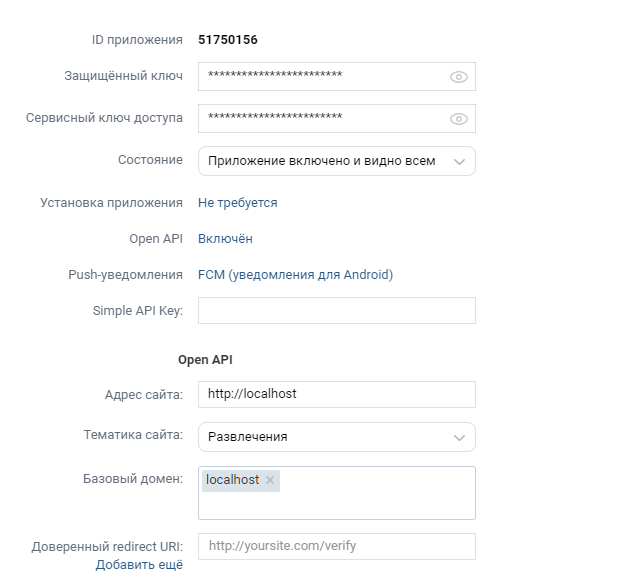

In [ ]:
data = requests.get(f'https://api.vk.com/method/friends.getLists&v=5.81&access_token={token}') # пример запроса списка друзей

In [ ]:
data = requests.get(f'https://api.vk.com/method/users.get?user_ids=oliseenko&v=5.81&access_token={token}') # пример запроса данных пользователя
txt = data.content.decode('utf-8')
txt

'{"response":[{"id":8126979,"first_name":"Валерий","last_name":"Олисеенко"}]}'

In [ ]:
#функция для запроса и обработки данных
def call_method(ref: str):
    data = requests.get(ref)
    txt = data.content.decode('utf-8')
    try:
        return json.loads(txt)['response']
    except:
        print(data)
        return {}

In [ ]:
data = requests.get(f'https://api.vk.com/method/friends.get?user_id=8126979&v=5.81&access_token={token}')
txt = data.content.decode('utf-8')
txt

'{"response":{"count":81,"items":[112289,265528,621197,930855,2724404,6649825,10051843,12211515,13734194,15703609,15936560,17733284,19156140,20925262,21266206,24376686,26647257,27016300,27362545,27843790,31565880,32898283,35218291,38372751,38496473,41455425,48670676,52276202,57573478,57871567,59765473,61226335,64513869,65499745,67402413,69683060,69879968,77495835,77713485,78889200,79287916,81605488,81907626,84266843,88983303,93160901,94273466,94427119,107414072,117983610,126057494,127713765,133130467,136276519,140903455,141483512,145503609,145586920,145672223,146510529,156525582,157676193,169106503,169831171,169980965,178293756,184805648,184816596,185022314,193706871,203437876,224483580,230558590,235993601,275190036,319653057,371906297,555418006,568185451,570904936,738333821]}}'

In [ ]:
#пример работы функции
call_method(f'https://api.vk.com/method/users.get?user_id=8126979&fields=universities,occupation,sex&v=5.81&access_token={token}')

[{'id': 8126979,
  'occupation': {'name': 'Лаборатория ТиМПИ | TICS LAB | Лаборатория любви',
   'type': 'work'},
  'universities': [{'chair': 90,
    'chair_name': ' Кафедра информатики',
    'city': 2,
    'country': 1,
    'education_form': 'Очное отделение',
    'education_form_id': 1,
    'education_status': 'Аспирант',
    'education_status_id': 8,
    'faculty': 7,
    'faculty_name': 'Математико-механический факультет',
    'graduation': 2024,
    'id': 1,
    'name': 'СПбГУ'},
   {'chair': 2035539,
    'chair_name': 'Математическое обеспечение и администрирование информационных систем',
    'city': 2,
    'country': 1,
    'education_form': 'Очное отделение',
    'education_form_id': 1,
    'education_status': 'Выпускник (магистр)',
    'education_status_id': 7,
    'faculty': 7,
    'faculty_name': 'Математико-механический факультет',
    'graduation': 2020,
    'id': 1,
    'name': 'СПбГУ'},
   {'chair': 2186890,
    'chair_name': 'Прикладная математика и информатика',
    '

In [ ]:
db = { # создаём json
    8126979: {
        data: {}
    }
}

# заполняем наш json по ключам data и friends
db[8126979]['data']= call_method(f'https://api.vk.com/method/users.get?user_id=8126979&fields=universities,occupation,sex,city&v=5.81&access_token={token}')
db[8126979]['friends']= call_method(f'https://api.vk.com/method/friends.get?user_id=8126979&v=5.81&access_token={token}')['items']

for i in db[8126979]['friends']: # далее в цикле заполняем в json наших друзей
    db[i] = {'data': call_method(f'https://api.vk.com/method/users.get?user_id={i}&fields=universities,occupation,sex,city&v=5.81&access_token={token}')}
    time.sleep(1)
    friends = call_method(f'https://api.vk.com/method/friends.get?user_id={i}&v=5.81&access_token={token}')
    time.sleep(1)
    if friends:
        db[i]['friends'] = friends['items']


<Response [200]>


In [ ]:
import joblib # сохраняем наш json файл в bin
joblib.dump(db, 'db.bin')

['db.bin']

In [ ]:
db = joblib.load('db.bin') # загружаем из файла

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


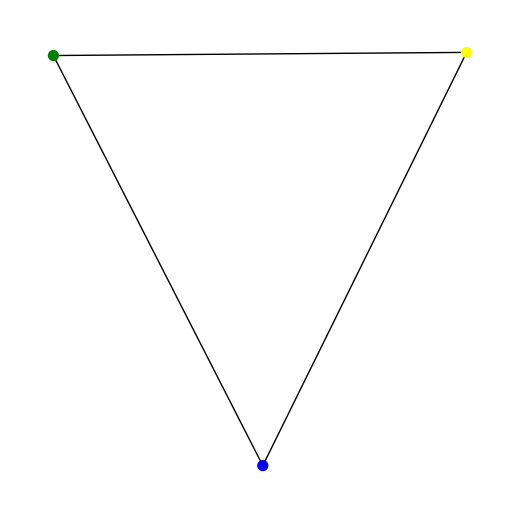

In [ ]:
# пример раскраски вершин графа
graph = nx.from_numpy_array(
    np.array([[0,1,1],
     [1,0,1],
      [0,0,0]]))


plt.figure(figsize=(5, 5))
pos=graphviz_layout(graph)

nx.draw(graph, pos, node_color= ['green', 'yellow','blue'], node_size=50)


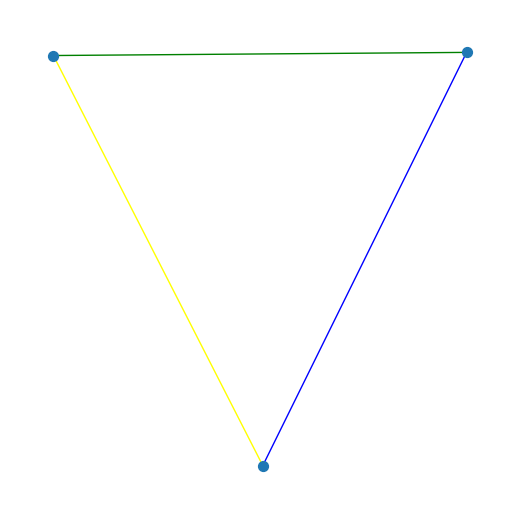

In [ ]:
# пример раскраски рёбер графа
graph = nx.from_numpy_array(
    np.array([[0,1,1],
     [1,0,1],
      [0,0,0]]))


plt.figure(figsize=(5, 5))
pos=graphviz_layout(graph)

nx.draw(graph, pos, edge_color = ['green', 'yellow','blue'], node_size=50)

In [ ]:
my_friends = db[8126979]['friends']
adj_matrix = np.zeros((len(my_friends), len(my_friends)))
adj_matrix_uni = np.zeros_like(adj_matrix)
adj_matrix_job = np.zeros_like(adj_matrix)
adj_matrix_city = np.zeros_like(adj_matrix)

adj_matrix_uni_pot = np.zeros_like(adj_matrix)
adj_matrix_city_pot = np.zeros_like(adj_matrix)

females = list()
males = list()


# fill friends links

for i in range(len(my_friends)):


    for j in range(i + 1, len(my_friends)):
        if i != j:
            if ('friends' in db[my_friends[j]].keys() and my_friends[i] in db[my_friends[j]]['friends']) or \
            ('friends' in db[my_friends[i]].keys() and my_friends[j] in db[my_friends[i]]['friends']):
                adj_matrix[i, j] = adj_matrix[j, i] = 1

                if 'data' in db[my_friends[j]].keys() and 'data' in db[my_friends[i]].keys():
                    if type(db[my_friends[j]]['data']) != list or type(db[my_friends[i]]['data']) != list:
                        continue

                    if 'occupation' in db[my_friends[i]]['data'][0] and 'occupation' in db[my_friends[j]]['data'][0]:
                        i_occupation = db[my_friends[i]]['data'][0]['occupation']
                        j_occupation = db[my_friends[j]]['data'][0]['occupation']

                        if i_occupation['type'] == 'work' and j_occupation['type'] == 'work':
                            if i_occupation['name'] == j_occupation['name']:
                                adj_matrix_job[i, j] = adj_matrix_job[j, i] = 1


                    if 'universities' in db[my_friends[i]]['data'][0] and 'universities' in db[my_friends[j]]['data'][0]:
                        i_universities = set([u['name'] for u in db[my_friends[i]]['data'][0]['universities']])
                        j_universities = set([u['name'] for u in db[my_friends[j]]['data'][0]['universities']])
                        if len(i_universities.intersection(j_universities)) > 0:
                            adj_matrix_uni[i, j] = adj_matrix_uni[j, i] = 1

                    if 'city' in db[my_friends[i]]['data'][0] and 'city' in db[my_friends[j]]['data'][0]:
                        city_i = db[my_friends[i]]['data'][0]['city']
                        city_j = db[my_friends[j]]['data'][0]['city']

                        if city_i['title'] == city_j['title']:
                            adj_matrix_city[i, j] = adj_matrix_city[j, i] = 1
            else:
                if 'data' in db[my_friends[j]].keys() and 'data' in db[my_friends[i]].keys():
                    if type(db[my_friends[j]]['data']) != list or type(db[my_friends[i]]['data']) != list:
                        continue

                    if 'universities' in db[my_friends[i]]['data'][0] and 'universities' in db[my_friends[j]]['data'][0]:
                        i_universities = set([u['name'] for u in db[my_friends[i]]['data'][0]['universities']])
                        j_universities = set([u['name'] for u in db[my_friends[j]]['data'][0]['universities']])
                        if len(i_universities.intersection(j_universities)) > 0:
                            adj_matrix_uni_pot[i, j] = adj_matrix_uni_pot[j, i] = 1

                    if 'city' in db[my_friends[i]]['data'][0] and 'city' in db[my_friends[j]]['data'][0]:
                        city_i = db[my_friends[i]]['data'][0]['city']
                        city_j = db[my_friends[j]]['data'][0]['city']

                        if city_i['title'] == city_j['title']:
                            adj_matrix_city_pot[i, j] = adj_matrix_city_pot[j, i] = 1

In [ ]:
print('общая работа:', adj_matrix_job.sum() / 2)
print('общий вуз:', adj_matrix_uni.sum() / 2)
print('общий город:', adj_matrix_city.sum() / 2)
print('общий вуз:', adj_matrix_uni_pot.sum() / 2)
print('общий город:', adj_matrix_city_pot.sum() / 2)

общая работа: 3.0
общий вуз: 80.0
общий город: 108.0
общий вуз: 327.0
общий город: 391.0


In [ ]:
graph = nx.from_numpy_array(adj_matrix)

In [ ]:
colors = list()

for node in graph:
    if node in females:
        colors.append('red')
    elif node in males:
        colors.append('blue')
    else:
        colors.append('gray')

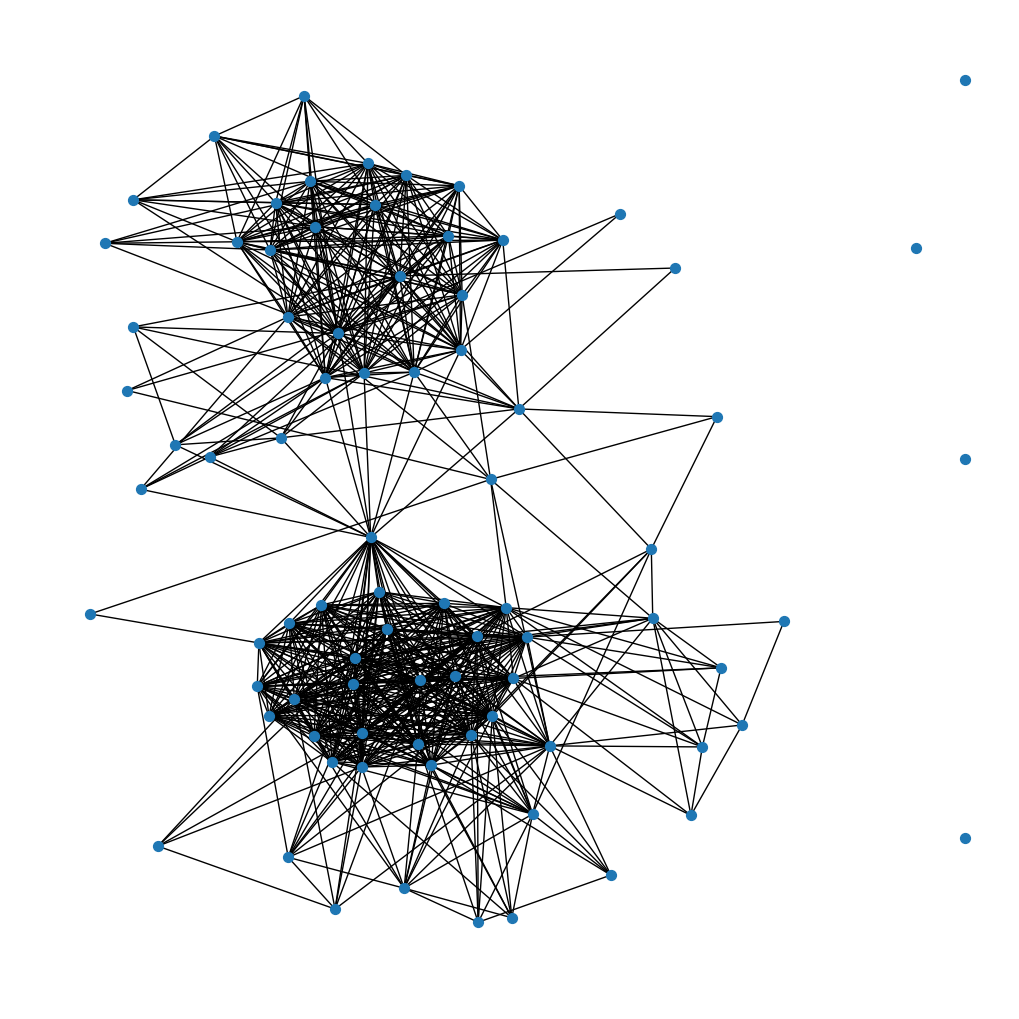

In [ ]:
#!apt install libgraphviz-dev
#!pip install pygraphviz

plt.figure(figsize=(10, 10))
pos=graphviz_layout(graph)
#nx.draw_networkx_labels(graph, pos, {k: v for k, v in enumerate(my_friends)},font_size=8)
nx.draw(graph, pos, node_color = None, node_size=50)

In [ ]:
graph = nx.from_numpy_array(adj_matrix)

In [ ]:
edge_colors = list()
edge_width = list()
for a, b in graph.edges():
    c = 'gray'
    w = 1
    if adj_matrix_city[a, b] == 1:
        c = 'blue'
        w = 3
    edge_colors.append(c)
    edge_width.append(w)

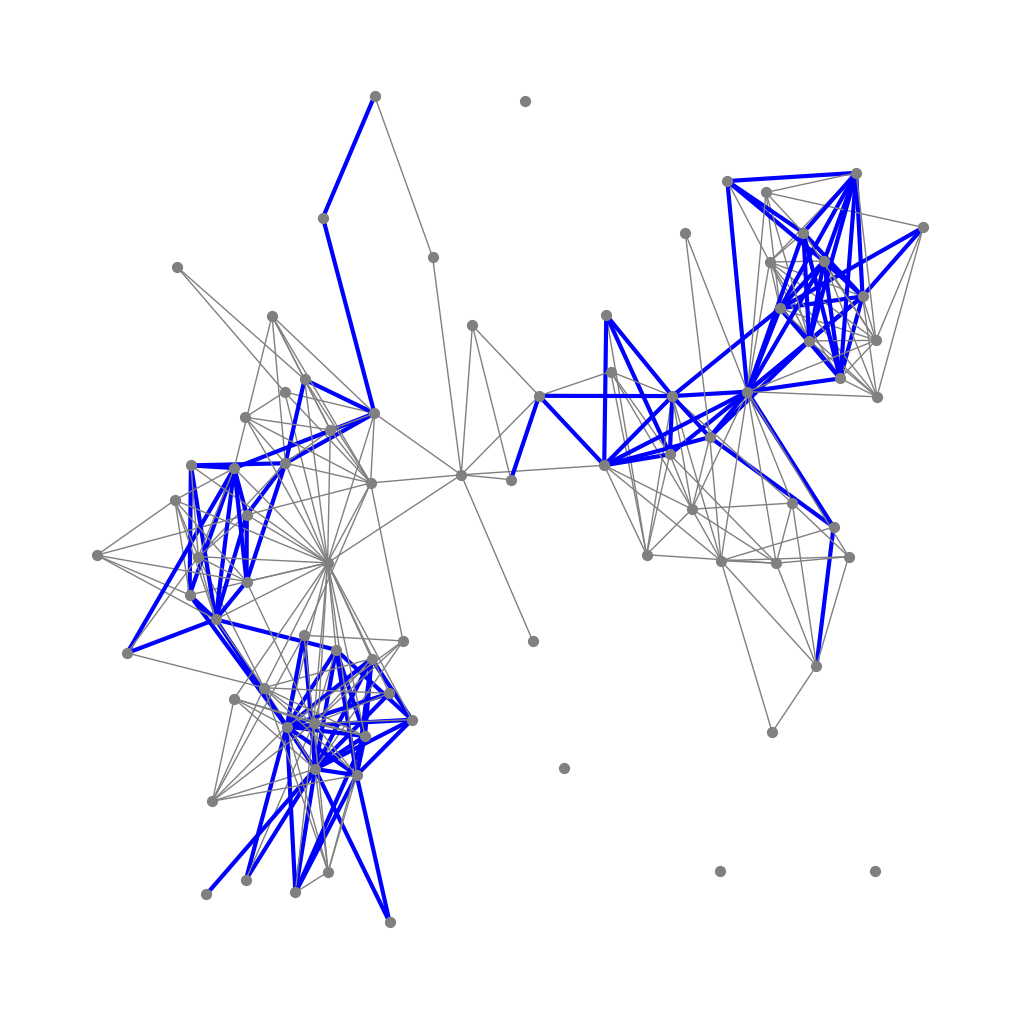

In [ ]:
plt.figure(figsize=(10, 10))
pos=graphviz_layout(graph)
#nx.draw_networkx_labels(graph, pos, {k: v for k, v in enumerate(my_friends)},font_size=8)
nx.draw(graph, pos, node_color='gray', edge_color = edge_colors, width=edge_width, node_size=50)

In [ ]:
graph = nx.from_numpy_array(adj_matrix.astype(bool) | adj_matrix_city_pot.astype(bool))

In [ ]:
edge_colors = list()
edge_width = list()
for a, b in graph.edges():
    c = 'gray'
    w = 1
    if adj_matrix_city_pot[a, b] == 1:
        c = 'blue'
        w = 3
    edge_colors.append(c)
    edge_width.append(w)

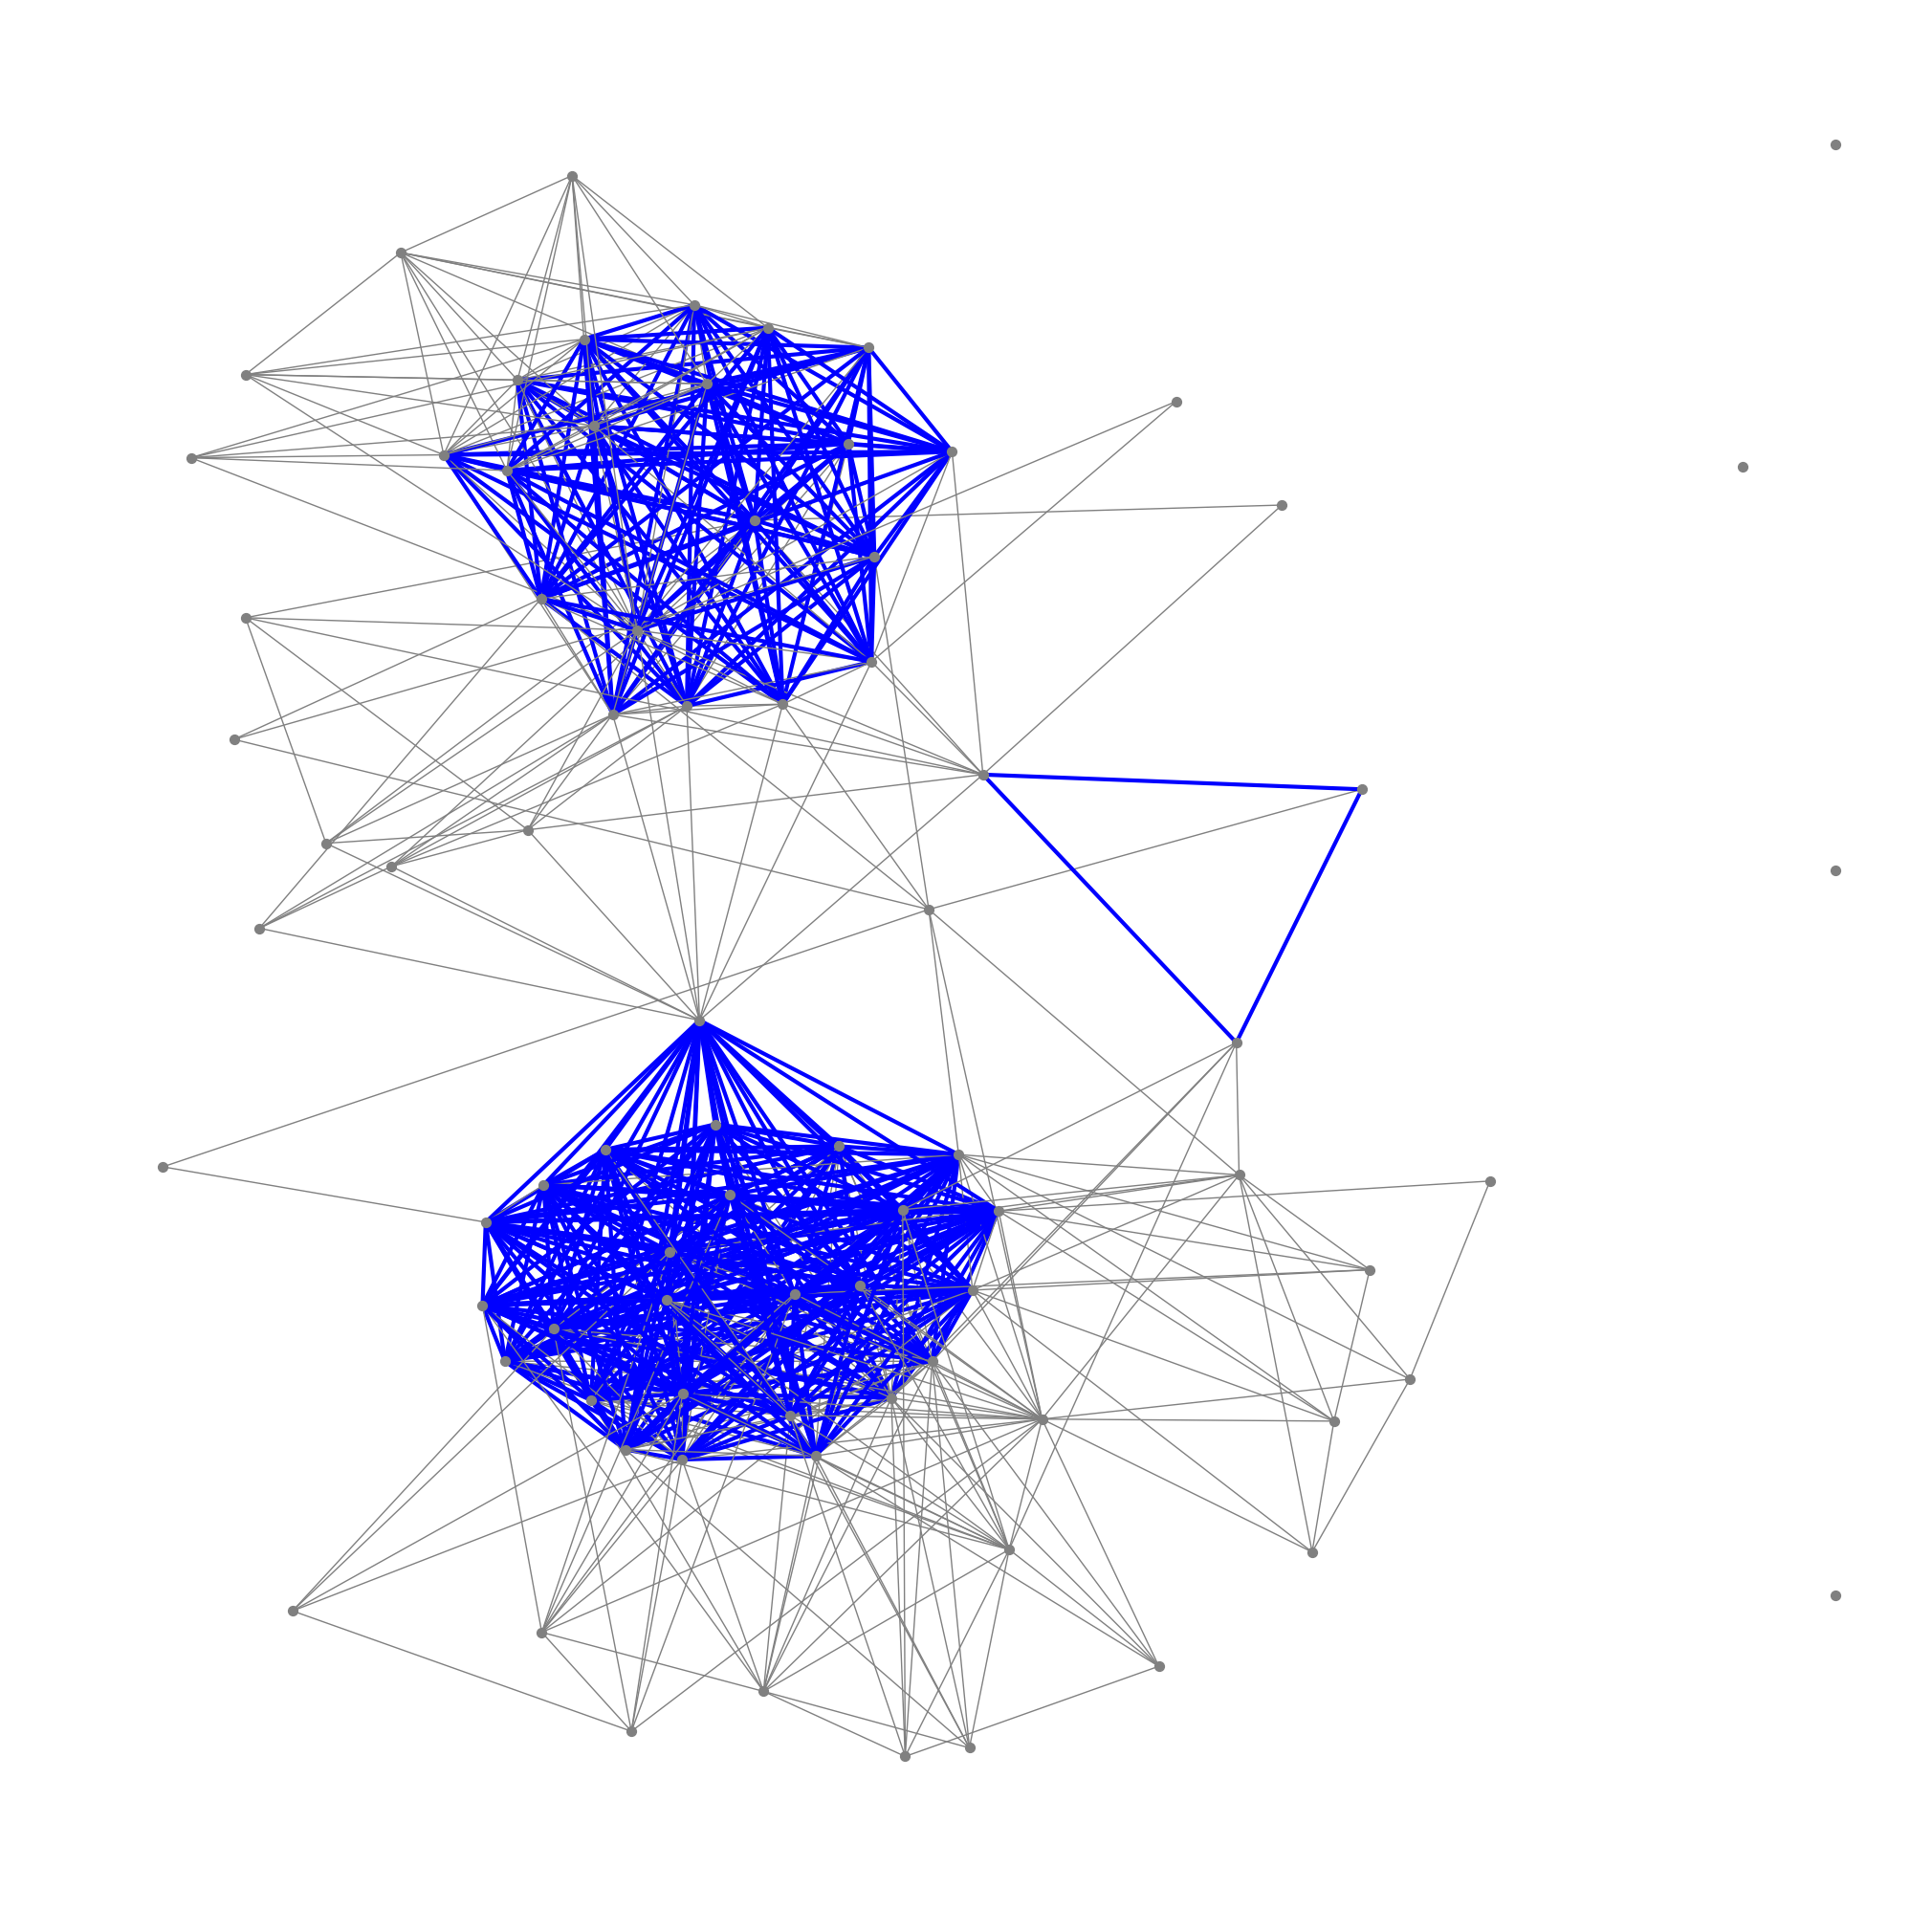

In [ ]:
plt.figure(figsize=(20, 20))
pos=graphviz_layout(graph)
#nx.draw_networkx_labels(graph, pos, {k: v for k, v in enumerate(my_friends)},font_size=8)
nx.draw(graph, pos, node_color='gray', edge_color = edge_colors, width=edge_width, node_size=50)